<p style = "font-size : 30px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 10px 10px;"><strong>Regression Model on Electricity Bill Prediction</strong></p>

<a id='1.0'></a>
<p style="font-size: 35px; color: #2a3d66; font-family: 'Comic Sans MS'; text-align: center; background-color: #d37c7c; border-radius: 5px 5px;">
    <strong>About Dataset</strong>
</p>


# Indian Household Electricity Consumption Dataset

**The "Indian Household Electricity Consumption Dataset" is a comprehensive dataset that captures the electricity consumption patterns of Indian households. It includes information about the number of hours each household appliance, such as fans, air conditioners, refrigerators, televisions, monitors, and motor pumps, operates in a month. Additionally, it incorporates demographic factors like the city of residence and the electricity distribution company serving that city.**  

**This dataset is designed to help predict the monthly electricity bills for Indian households based on appliance usage and other relevant factors. It can be used in various applications, such as - Energy management and Consumer insights.**


<a id='1.0'></a>
<p style="font-size: 35px; color: #2a3d66; font-family: 'Comic Sans MS'; text-align: center; background-color: #ffd580; border-radius: 5px 5px;">
    <strong>Problem Statement</strong>
</p>


### **Predict the monthly electricity bill for Indian households based on appliance usage.**

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>Import Required Library</strong></p> `

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Downloading the Dataset 

In [ ]:
# https://www.kaggle.com/datasets/suraj520/indian-household-electricity-bill

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suraj520/indian-household-electricity-bill")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\udayk\.cache\kagglehub\datasets\suraj520\indian-household-electricity-bill\versions\1


In [2]:
data = pd.read_csv(r"C:\Users\udayk\.cache\kagglehub\datasets\suraj520\indian-household-electricity-bill\versions\1\electricity_bill_dataset.csv")

In [3]:
data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


# Data Quality

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [10]:
df = data.copy()

# checking Null values

### - no null values found

In [13]:
df.isna().sum()


Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [15]:
df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

# Checking Duplicates

#### - no dupplicates found

In [18]:
df[df.duplicated()]

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>Simple EDA</strong></p> `

C:\Users\udayk\AppData\Local\Temp\ipykernel_13876\438800790.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


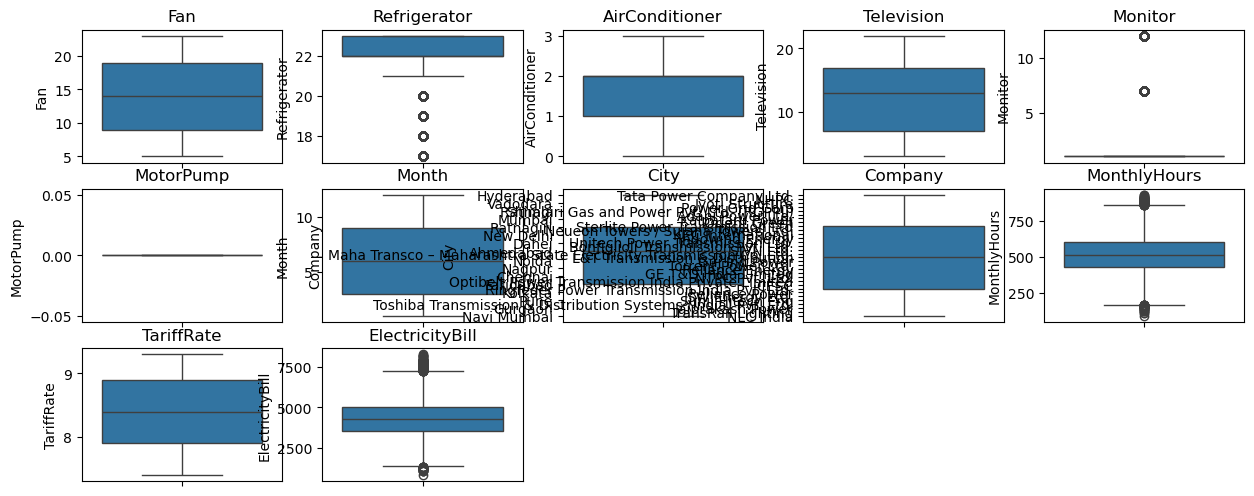

In [21]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

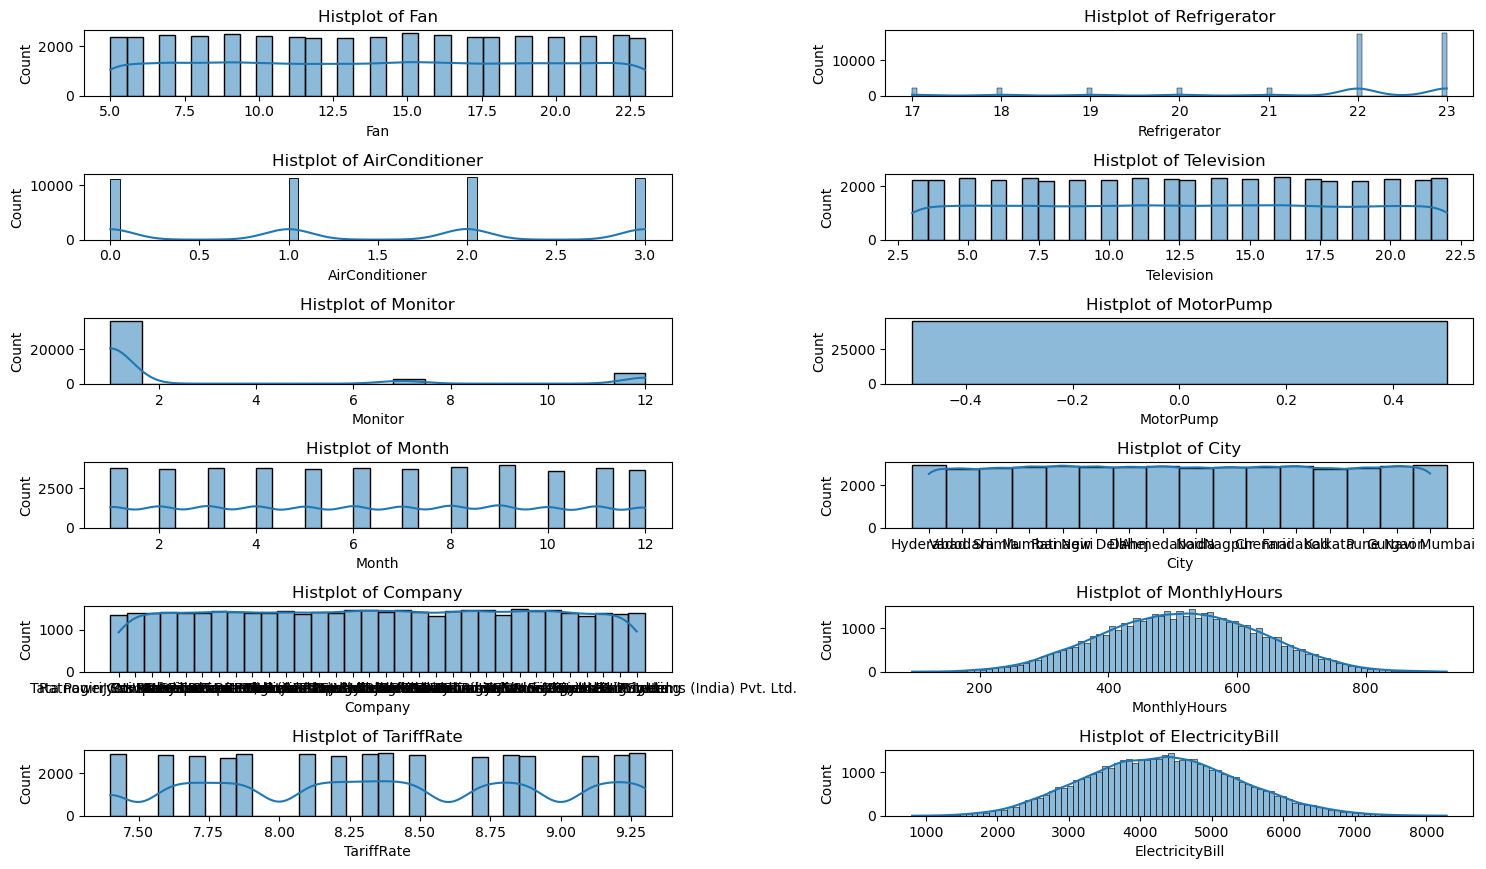

In [23]:
plt.figure(figsize=(15, 17))

columns = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill']
for i, col in enumerate(columns, 1):
    plt.subplot(12, 2, i)
    sns.histplot(x=df[col], kde=True)
    plt.title(f'Histplot of {col}')

plt.tight_layout()
plt.show()

# Target Column Distribution

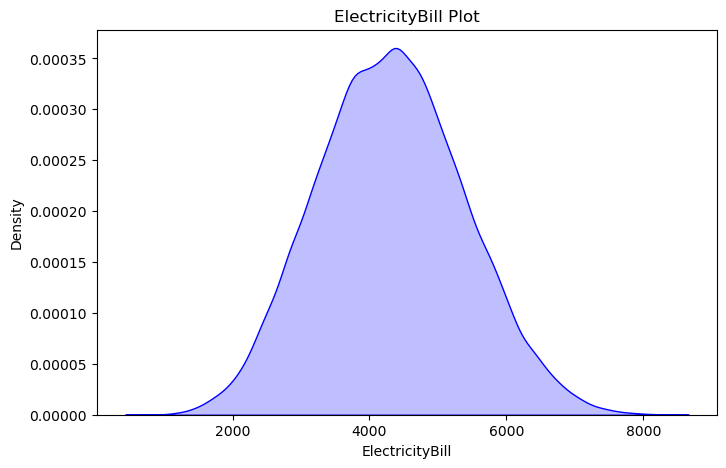

In [25]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['ElectricityBill'], fill=True, color="blue")
plt.title('ElectricityBill Plot')
plt.show()

# Insight :
ElectricityBill distribution is approximately **bell-shaped** and slightly **right-skewed**, indicating that most households have bills concentrated around **₹4000-₹5000**, with fewer extreme high values beyond **₹8000**. The smooth density curve suggests a fairly continuous distribution without sharp peaks or gaps

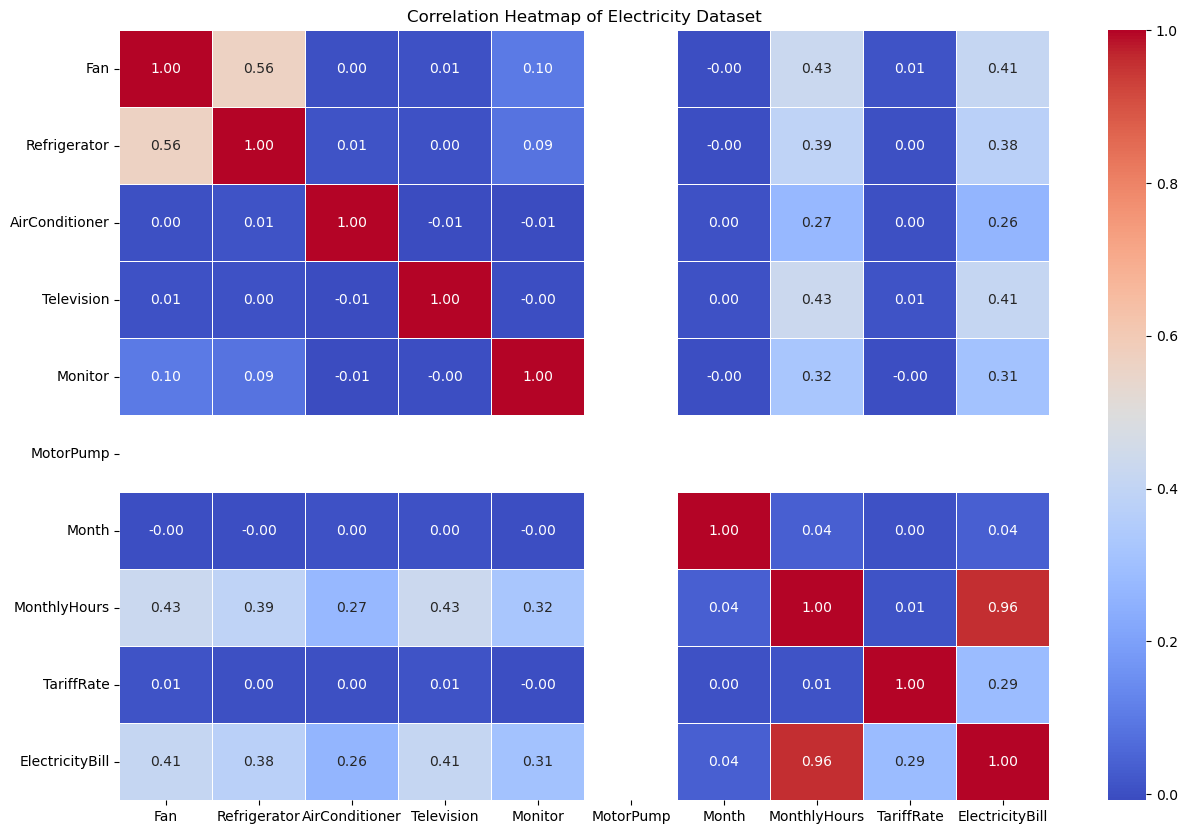

In [27]:
# Compute the correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Electricity Dataset")
plt.show()


# Insight :
**Strongest Correlation**
- ElectricityBill & MonthlyHours **(0.96)**: The electricity bill is highly correlated with the total monthly usage hours of appliances, meaning longer usage leads to higher bills.
- Fan & Refrigerator **(0.56)**: Households using fans frequently also tend to use refrigerators more.
- TariffRate & ElectricityBill **(0.29)**: Higher tariff rates moderately increase electricity bills.<br>

**Moderate Correlations:**
  
- Fan & MonthlyHours **(0.43)**: Fans contribute significantly to total monthly usage.
- Television & MonthlyHours **(0.43)**: TV usage is also a major factor in total electricity consumption.
- Monitor & ElectricityBill **(0.31)**: Monitors have a moderate impact on the electricity bill.<br>

**Weak or No Correlation:**

- AirConditioner & Other Appliances **(~0.01)**: AC usage is independent of other appliances.
- Month & ElectricityBill **(0.04)**: The month does not significantly impact electricity bills, suggesting seasonality may not be a major factor.

- MotorPump column has all values as zero, it does not contribute to electricity consumption and has no correlation with any other features.
- It can be dropped from the dataset as it does not impact the electricity bill or any other feature.

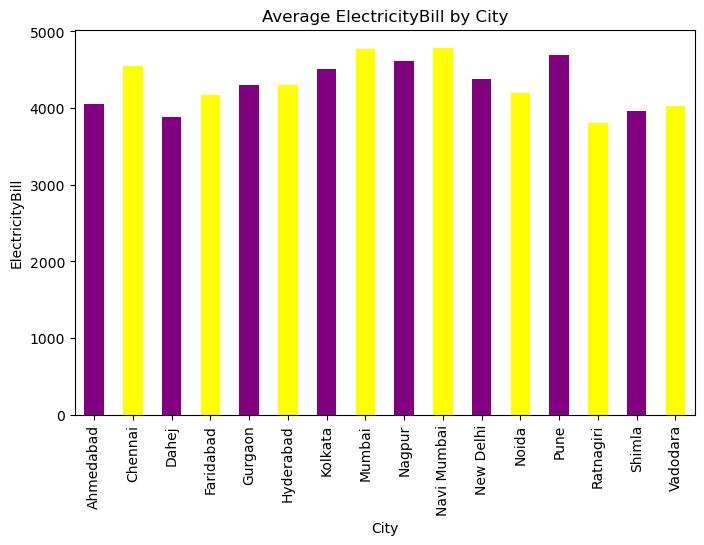

In [20]:
plt.figure(figsize=(8, 5))
df.groupby('City')['ElectricityBill'].mean().plot(kind='bar', color=['purple', 'yellow'])
plt.title('Average ElectricityBill by City')
plt.ylabel('ElectricityBill')
plt.show()


In [38]:
df["MotorPump"].unique()

array([0], dtype=int64)

In [40]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [42]:
df = df.drop(columns = "MotorPump")

In [44]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>
Data Pre-Processing</strong></p> `

In [47]:
fv = df.drop(columns = "ElectricityBill")

In [49]:
fv

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8
2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2
...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9
45341,23,23.0,2.0,6.0,12.0,2,New Delhi,Orient Green,572,8.5
45342,22,22.0,2.0,20.0,1.0,1,New Delhi,GE T&D India Limited,609,8.5
45343,8,21.0,2.0,22.0,7.0,12,Ratnagiri,TransRail Lighting,748,7.4


In [51]:
cv = df["ElectricityBill"]

In [53]:
cv

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [55]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.3,random_state = 42)

In [57]:
x_train

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
25952,21,22.0,1.0,18.0,1.0,3,Noida,Sterlite Power Transmission Ltd,479,8.2
37089,5,20.0,0.0,17.0,1.0,9,Vadodara,Indowind Energy,290,7.8
24172,22,22.0,1.0,18.0,1.0,6,Gurgaon,NHPC,573,8.3
6754,8,20.0,0.0,21.0,1.0,3,Ahmedabad,Indowind Energy,429,7.9
37227,10,18.0,0.0,7.0,1.0,2,Navi Mumbai,Toshiba Transmission & Distribution Systems (I...,270,9.3
...,...,...,...,...,...,...,...,...,...,...
11284,5,20.0,0.0,11.0,1.0,11,Noida,Orient Green,281,8.2
44732,7,18.0,3.0,14.0,1.0,2,Kolkata,Orient Green,550,8.7
38158,20,22.0,2.0,20.0,12.0,12,New Delhi,Kalpataru Power,814,8.5
860,18,22.0,1.0,5.0,12.0,4,Chennai,Reliance Energy,626,8.8


In [59]:
x_train_nominal = x_train.iloc[:,[6,7]]

In [61]:
x_train_nominal.head(2)

,City,Company
25952,Noida,Sterlite Power Transmission Ltd
37089,Vadodara,Indowind Energy


In [63]:
x_train_scaling=x_train.iloc[:,[0,1,2,3,4,5,8,9]]

In [65]:
x_train_scaling.head(2)

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate
25952,21,22.0,1.0,18.0,1.0,3,479,8.2
37089,5,20.0,0.0,17.0,1.0,9,290,7.8


In [67]:
from sklearn.preprocessing import OneHotEncoder

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>
Using One-Hot Encoder on nominal Columns of x_train</strong></p> `

In [70]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train_nominal_ohe=pd.DataFrame(ohe.fit_transform(x_train_nominal),columns=ohe.get_feature_names_out(x_train_nominal.columns),index=x_train_nominal.index)

In [72]:
x_train_nominal_ohe.head(2)

,City_Chennai,City_Dahej,City_Faridabad,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_Nagpur,City_Navi Mumbai,City_New Delhi,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
25952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>
Using StandardScaler on numerical Columns of x_train</strong></p> `

In [75]:
sc = StandardScaler()
x_train_scaling_sc=pd.DataFrame(sc.fit_transform(x_train_scaling),columns=x_train_scaling.columns,index=x_train_scaling.index)

In [77]:
x_train_scaling_sc.head(2)

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate
25952,1.279686,0.176742,-0.448335,0.954508,-0.481295,-1.010552,-0.292176,-0.290495
37089,-1.644376,-1.015473,-1.346448,0.780663,-0.481295,0.730607,-1.827793,-0.983760


In [79]:
x_train_final=pd.concat([x_train_scaling_sc,x_train_nominal_ohe],axis=1)

In [81]:
x_test_nominal=x_test.iloc[:,[6,7]]

In [83]:
x_test_scaling=x_test.iloc[:,[0,1,2,3,4,5,8,9]]

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>
Using One-Hot Encoder on nominal Columns of x_test</strong></p> `

In [86]:
x_test_nominal_ohe=pd.DataFrame(ohe.transform(x_test_nominal),columns=ohe.get_feature_names_out(x_test_nominal.columns),index=x_test_nominal.index)

In [88]:
x_test_nominal_ohe.head(2)

,City_Chennai,City_Dahej,City_Faridabad,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_Nagpur,City_Navi Mumbai,City_New Delhi,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
19060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>
Using StandardScaler on numerical Columns of x_test</strong></p> `

In [91]:
x_test_scaling_sc=pd.DataFrame(sc.transform(x_test_scaling),columns=x_test_scaling.columns,index=x_test_scaling.index)

In [93]:
x_test_final=pd.concat([x_test_scaling_sc,x_test_nominal_ohe],axis=1)

In [95]:
x_train_final.head(2)

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,City_Chennai,City_Dahej,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
25952,1.279686,0.176742,-0.448335,0.954508,-0.481295,-1.010552,-0.292176,-0.290495,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37089,-1.644376,-1.015473,-1.346448,0.780663,-0.481295,0.730607,-1.827793,-0.983760,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
x_test_final.head(2)

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,City_Chennai,City_Dahej,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
19060,-0.182345,0.772849,-0.448335,-0.262408,2.330977,-0.720359,0.536569,0.576086,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17874,0.365916,0.176742,0.449778,-0.262408,-0.481295,0.730607,-0.706549,0.922719,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [101]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import cross_validate


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>Model Building</strong></p> `

In [104]:
def objective(trail):
  algo=trail.suggest_categorical('algo',['knn','dt','lr'])
  if algo=="knn":
    k=n_neighbors=trail.suggest_int('k',3,100)
    weights=trail.suggest_categorical('weights',['uniform','distance'])
    p1=trail.suggest_int("distance",1,2)
    alg=trail.suggest_categorical("algorithm",["ball_tree","kd_tree","brute"])
    model=KNeighborsRegressor(n_neighbors=k,weights=weights,p=p1,algorithm=alg)
    model.fit(x_train_final,y_train)
  elif algo=="dt":
    max_depth=trail.suggest_int("max_depth",1,50)
    min_samples_split=trail.suggest_int("min_samples_split",2,50)
    min_samples_leaf=trail.suggest_int("min_samples_leaf",1,50)
    min_weight_fraction_leaf=trail.suggest_float("min_weight_fraction_leaf",0.0,0.15)
    min_impurity_decrease=trail.suggest_float("min_impurity_decrease",0.015,1.0)
    max_features=trail.suggest_int("max_features",1,7)
    model=DecisionTreeRegressor(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,min_impurity_decrease=min_impurity_decrease,max_features=max_features)
    model.fit(x_train_final,y_train)
  elif algo=='lr':
    penalty = trail.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    alpha = trail.suggest_float('alpha', 0.001, 100)
    ratio = trail.suggest_float('ratio', 0.1, 0.9)
    max_iter = trail.suggest_int('max_iter', 100, 1000, step=100)
    model=SGDRegressor(penalty=penalty,alpha=alpha,l1_ratio=ratio,max_iter=max_iter)
    model.fit(x_train_final,y_train)

  cv_score=cross_validate(model,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['test_score'].mean()
  train_score=cross_validate(model,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['train_score'].mean()
  trail.set_user_attr(key="cv_score",value=cv_score)
  trail.set_user_attr(key="train_score",value=train_score)
  return cv_score

In [106]:
study=optuna.create_study(direction="maximize",sampler=TPESampler())

[I 2025-04-23 21:24:47,225] A new study created in memory with name: no-name-2a47d0ff-b2ba-472c-b115-3284ad5eb395


In [108]:
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-04-23 21:24:51,574] Trial 7 finished with value: 0.0382057612297619 and parameters: {'algo': 'dt', 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.10023921301969625, 'min_impurity_decrease': 0.1721562074552736, 'max_features': 4}. Best is trial 7 with value: 0.0382057612297619.
[I 2025-04-23 21:24:56,106] Trial 2 finished with value: 0.07813169475450872 and parameters: {'algo': 'lr', 'penalty': 'elasticnet', 'alpha': 48.33373117263279, 'ratio': 0.2359996692563594, 'max_iter': 500}. Best is trial 2 with value: 0.07813169475450872.
[I 2025-04-23 21:24:58,883] Trial 5 finished with value: 0.20902533588741437 and parameters: {'algo': 'lr', 'penalty': 'elasticnet', 'alpha': 19.308381962307376, 'ratio': 0.35163666810924954, 'max_iter': 500}. Best is trial 5 with value: 0.20902533588741437.
[I 2025-04-23 21:24:58,908] Trial 0 finished with value: 0.09064769273052242 and parameters: {'algo': 'lr', 'penalty': 'elasticnet', 'alpha': 89.044242

In [110]:
study.best_value

0.9956621810248731

In [112]:
study.best_params

{'algo': 'lr',
 'penalty': 'l1',
 'alpha': 0.5214955692738101,
 'ratio': 0.7632818669162816,
 'max_iter': 300}

In [114]:
lr = SGDRegressor(penalty="l1",alpha = 0.5214955692738101,l1_ratio =0.7632818669162816, max_iter = 300)
model = lr.fit(x_train_final,y_train)
y_cap = model.predict(x_test_final)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_cap)
r2 = r2_score(y_test, y_cap)
print("MSE:", mse)
print("R² Score:", r2)

MSE: 4976.319956823021
R² Score: 0.9956349941384105


In [120]:
dff = study.trials_dataframe()
dff

,number,value,datetime_start,datetime_complete,duration,params_algo,params_algorithm,params_alpha,params_distance,params_k,...,params_min_impurity_decrease,params_min_samples_leaf,params_min_samples_split,params_min_weight_fraction_leaf,params_penalty,params_ratio,params_weights,user_attrs_cv_score,user_attrs_train_score,state
0,0,0.090648,2025-04-23 21:24:50.110969,2025-04-23 21:24:58.904959,0 days 00:00:08.793990,lr,NaN,89.044243,NaN,NaN,...,NaN,NaN,NaN,NaN,elasticnet,0.646693,NaN,0.090648,0.088527,COMPLETE
1,1,0.526998,2025-04-23 21:24:50.121870,2025-04-23 21:25:02.278362,0 days 00:00:12.156492,lr,NaN,7.004090,NaN,NaN,...,NaN,NaN,NaN,NaN,elasticnet,0.549030,NaN,0.526998,0.535255,COMPLETE
2,2,0.078132,2025-04-23 21:24:50.130342,2025-04-23 21:24:56.104091,0 days 00:00:05.973749,lr,NaN,48.333731,NaN,NaN,...,NaN,NaN,NaN,NaN,elasticnet,0.236000,NaN,0.078132,0.078071,COMPLETE
3,3,0.988131,2025-04-23 21:24:50.150743,2025-04-23 21:24:58.916769,0 days 00:00:08.766026,lr,NaN,66.012998,NaN,NaN,...,NaN,NaN,NaN,NaN,l1,0.380774,NaN,0.988131,0.988662,COMPLETE
4,4,0.934629,2025-04-23 21:24:50.200165,2025-04-23 21:26:13.742949,0 days 00:01:23.542784,knn,brute,NaN,2.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,uniform,0.934629,0.938035,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.912535,2025-04-23 22:09:26.712000,2025-04-23 22:56:31.767345,0 days 00:47:05.055345,knn,ball_tree,NaN,1.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,uniform,0.912535,0.920318,COMPLETE
96,96,0.314058,2025-04-23 22:20:33.625069,2025-04-23 22:20:34.181636,0 days 00:00:00.556567,dt,NaN,NaN,NaN,NaN,...,0.349084,21.0,15.0,0.032799,NaN,NaN,NaN,0.314058,0.277964,COMPLETE
97,97,0.995592,2025-04-23 22:20:34.185656,2025-04-23 22:20:37.606988,0 days 00:00:03.421332,lr,NaN,6.696759,NaN,NaN,...,NaN,NaN,NaN,NaN,l1,0.448435,NaN,0.995592,0.995606,COMPLETE
98,98,0.995652,2025-04-23 22:20:37.610846,2025-04-23 22:20:53.775386,0 days 00:00:16.164540,lr,NaN,0.253021,NaN,NaN,...,NaN,NaN,NaN,NaN,l1,0.563624,NaN,0.995652,0.995656,COMPLETE


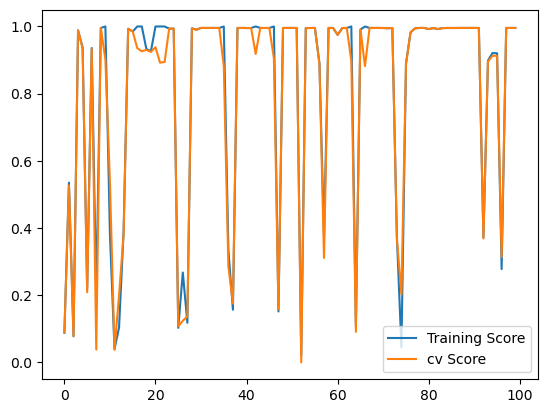

In [124]:
plt.plot(dff["number"],dff["user_attrs_train_score"],label = "Training Score")
plt.plot(dff["number"],dff["value"],label = "cv Score")
plt.legend()
plt.show()

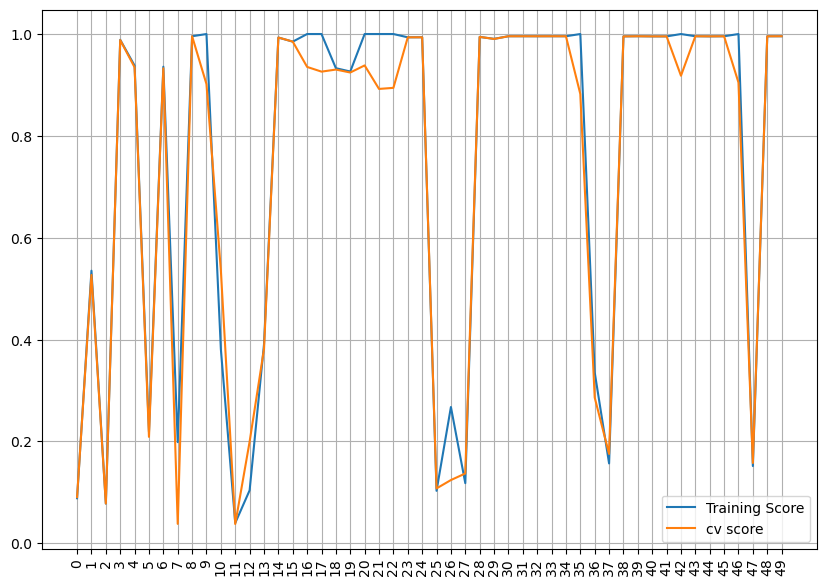

In [126]:
plt.figure(figsize=(10,7))
plt.plot(dff["number"][0:50],dff["user_attrs_train_score"][0:50],label = "Training Score")
plt.plot(dff["number"][0:50],dff["value"][0:50],label = "cv score")
plt.legend()
plt.grid()
plt.xticks(dff["number"][0:50], rotation=90)
plt.show()

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #a0f00c; border-radius: 5px 5px;"><strong>Pipeline Building</strong></p> `

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [ ]:
nom_pl = Pipeline(steps=[('Encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
scale_pl = Pipeline(steps=[('Scaling', StandardScaler())])

# ColumnTransformer to apply the transformations
ct = ColumnTransformer(
    transformers=[
        ('nom_pl', nom_pl, [5,6,7]),
        ('scale_pl', scale_pl, [0,1,2,3,4,8,9])
    ]
)
lr = SGDRegressor(penalty="l1",alpha = 1.750054473358741,l1_ratio = 0.8901598069531234, max_iter = 100)
final_pl = Pipeline(steps=[('ct', ct), ('lr_model', lr)])

In [ ]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nom_pl',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [5, 6, 7]),
                                                 ('scale_pl',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 8, 9])])),
                ('lr_model',
                 SGDRegressor(alpha=1.750054473358741,
                              l1_ratio=0.8901598069531234, max_iter=100,
                              penalty='l1'))])

In [ ]:
r2_score(y_test,final_pl.predict(x_test))

0.9956244723254267

In [ ]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [ ]:
import pickle

In [ ]:
pickle.dump(final_pl, open("final_model_.pkl", "wb"))

In [ ]:
from google.colab import files
files.download("final_model_.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
25952,21,22.0,1.0,18.0,1.0,3,Noida,Sterlite Power Transmission Ltd,479,8.2
37089,5,20.0,0.0,17.0,1.0,9,Vadodara,Indowind Energy,290,7.8
24172,22,22.0,1.0,18.0,1.0,6,Gurgaon,NHPC,573,8.3
6754,8,20.0,0.0,21.0,1.0,3,Ahmedabad,Indowind Energy,429,7.9
37227,10,18.0,0.0,7.0,1.0,2,Navi Mumbai,Toshiba Transmission & Distribution Systems (I...,270,9.3


In [ ]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,12.000000,926.000000,9.300000,8286.300000


In [ ]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [ ]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [ ]:
y_train.head()

,ElectricityBill
25952,3927.8
37089,2262.0
24172,4755.9
6754,3389.1
37227,2511.0


In [ ]:
input_data = [[21,22.0,1.0,18.0,1.0,3,'Noida','Sterlite Power Transmission Ltd',479,8.2]]

# Make prediction
predicted_price = final_pl.predict(input_data)
print(predicted_price)

[3922.83677404]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
